In [32]:
from Twitter.analysis.data_processing_transformation import *

In [33]:
import math
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### Files locations

In [34]:
FILE_USERS = "../../data/users/raw_users_2019.csv"
FILE_USERS_TWEETS = "../../data/tweets/raw_tweets_2019.csv"

FILE_RETWEETS = "../../data/retweets/retweets_2019.csv"
FILE_RETWEETERS = "../../data/retweeters/retweets_users_2019.csv"

FINAL_DATASET = "../../data/processed_tweets/tweets_"
FINAL_DATASET_RETWEETS_INFO = "../../data/processed_retweets/retweets_info_"

### Load Datasets

In [35]:
df_tweets, df_users = load_datasets(FILE_USERS_TWEETS, FILE_USERS)

(1/10) - Loading datasets


/Users/migueloliveira/PycharmProjects/InformationFlow/Twitter/analysis/data_processing_transformation.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_users = pd.read_csv(filepath_or_buffer=user_path, sep=",")


In [36]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535027 entries, 0 to 535026
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   index              535027 non-null  int64 
 1   Unnamed: 0         535027 non-null  int64 
 2   tweet_id           535027 non-null  int64 
 3   text               535027 non-null  object
 4   user_id            535027 non-null  int64 
 5   timestamp          535027 non-null  object
 6   tweet_type         535027 non-null  object
 7   like_count         535027 non-null  int64 
 8   reply_count        535027 non-null  int64 
 9   retweet_count      535027 non-null  int64 
 10  quote_count        535027 non-null  int64 
 11  device             518149 non-null  object
 12  lang               535027 non-null  object
 13  topics_ids         535027 non-null  object
 14  topics             535027 non-null  object
 15  referenced_tweets  111928 non-null  object
dtypes: int64(8), object(

## Calculate tweet reach

#### These values indicate the maximum possible of people that could have seen a given tweet

To do this, a sum of all the original tweet user's followers is made with the followers from all the users that retweeted/quoted the tweet

Note: this assumes that if a retweet is then shared by retweet again, those next audiences are not taken into account

In [37]:
df_retweets_info = get_tweet_reach(df_tweets, df_users, FILE_RETWEETS, FILE_RETWEETERS)

(2/10) - Preparing to calculate tweet reach
         Calculating tweet reach



## Topic analysis

### Loading the previously trained topic analysis model and it's evaluations of each tweet text

In [38]:
process_topics(df_tweets)

(3/10) - Doing topics cleaning
         Topics: group topics by category
         Topics: removing NaNs and int conversion



In [39]:
df_tweets['topics_cleaned'].value_counts(normalize=True)

Person                  0.190215
TV and Movies           0.177633
Other                   0.166645
Brand                   0.153665
Interest and Hobbies    0.138305
Entities                0.106647
Sport                   0.037750
Music                   0.010406
Video Game              0.010166
Political               0.007491
Book                    0.001072
Holiday                 0.000005
Name: topics_cleaned, dtype: float64

## Sentiment analysis

In [40]:
sentiment_classification(df_tweets)

(4/10) - Doing sentiment classification



In [41]:
df_tweets.head(5)

,index,Unnamed: 0,tweet_id,text,user_id,timestamp,tweet_type,like_count,reply_count,retweet_count,quote_count,device,lang,topics_ids,topics,referenced_tweets,ref_tweed_id,reach,topics_cleaned,sentiment
0,491246,491246,1079904885246705665,I’ll never salt you down 😌,497001647,2019-01-01 00:59:22,Original Tweet,0,0,0,0,iPhone,en,-1,,NaN,0,1468,None,Positive
1,491248,491248,1079904884445581312,You know who you are; but some of you I’ve fol...,112542289,2019-01-01 00:59:22,Original Tweet,2,0,1,0,iPhone,en,-1,,NaN,0,2969,None,Positive
2,491247,491247,1079904885175476224,Oh she a freak freak https://t.co/uJqYxJUGgg,2372981097,2019-01-01 00:59:22,Original Tweet,0,0,0,0,iPhone,en,-1,,NaN,0,809,None,Negative
3,491245,491245,1079904885531791360,Don’t forget your red thong ladies,2446281619,2019-01-01 00:59:23,Original Tweet,2,0,0,0,iPhone,en,-1,,NaN,0,112,None,Negative
4,491244,491244,1079904886014107648,Thankful for my crazy life,823355577526931457,2019-01-01 00:59:23,Original Tweet,5,1,0,0,iPhone,en,-1,,NaN,0,356,None,Positive


## Hashtags

In [42]:
hashtags(df_tweets)

(5/10) - Checking hashtags presence



## Tweet popularity

To define tweet popularity, each tweet with at least 1 retweet or 1 quote tweet was considered popular (1)
if the criteria wasn't met it was marked as unpopular (0)

In [43]:
popularity(df_tweets)

(6/10) - Popularity classification



In [44]:
df_tweets['popularity'].value_counts(normalize=True)

0    0.825358
1    0.174642
Name: popularity, dtype: float64

## Combine the two datasets into the final one

For every tweet select the relevant columns and merge the corresponding information from the original user

In [45]:
df = merge_tweets_and_users(df_tweets, df_users)

(7/10) - Merging tweets and corresponding users



### Categorize by year, month, week days and phases of the day

In [46]:
df['year'] = df['timestamp'].apply(lambda x: x.year)
df['month'] = df['timestamp'].apply(lambda x: x.strftime('%B'))
df['day_of_week'] = df['timestamp'].apply(lambda x: x.strftime('%A'))
df['day_phase'] = df['timestamp'].apply(lambda x: get_day_phase(int(x.hour)))
df['week_idx'] = df['timestamp'].apply(lambda x: '%s-%s' % (x.year, '{:02d}'.format(x.isocalendar()[1])))
df.head(5)

,index,tweet_id,text,timestamp,user_id,like_count,retweet_count,quote_count,reply_count,reach,...,followers,following,tweet_count,verified,created_at,year,month,day_of_week,day_phase,week_idx
0,0,1079904885246705665,I’ll never salt you down 😌,2019-01-01 00:59:22,497001647,0,0,0,0,1468,...,1468,1043,32941,False,2012-02-19 14:20:44+00:00,2019,January,Tuesday,Middle of the night,2019-01
1,1,1181478514601672704,I need to go to sleeeeeep,2019-10-08 07:56:43+00:00,497001647,0,0,0,0,1468,...,1468,1043,32941,False,2012-02-19 14:20:44+00:00,2019,October,Tuesday,Morning,2019-41
2,2,1079904884445581312,You know who you are; but some of you I’ve fol...,2019-01-01 00:59:22,112542289,2,1,0,0,2969,...,2969,2890,137517,False,2010-02-08 21:52:01+00:00,2019,January,Tuesday,Middle of the night,2019-01
3,3,1083000265597485056,Good morning frens. Don’t think about yesterda...,2019-01-09 13:59:19,112542289,5,1,0,0,2969,...,2969,2890,137517,False,2010-02-08 21:52:01+00:00,2019,January,Wednesday,Afternoon,2019-02
4,4,1100394993972404224,Have any of you seen that post about the salon...,2019-02-26 13:59:45+00:00,112542289,3,1,0,1,4897,...,2969,2890,137517,False,2010-02-08 21:52:01+00:00,2019,February,Tuesday,Afternoon,2019-09


In [47]:
one_hot_encoder(df)
df.head(5)

                  Running OneHotEncoder


,index,tweet_id,text,timestamp,user_id,like_count,retweet_count,quote_count,reply_count,reach,...,topics_cleaned_Person,topics_cleaned_Political,topics_cleaned_Sport,topics_cleaned_TV and Movies,topics_cleaned_Video Game,topics_cleaned_None,sentiment_Neutral,sentiment_Positive,verified_True,hashtags_True
0,0,1079904885246705665,I’ll never salt you down 😌,2019-01-01 00:59:22,497001647,0,0,0,0,1468,...,0,0,0,0,0,1,0,1,0,0
1,1,1181478514601672704,I need to go to sleeeeeep,2019-10-08 07:56:43+00:00,497001647,0,0,0,0,1468,...,0,0,0,0,0,1,1,0,0,0
2,2,1079904884445581312,You know who you are; but some of you I’ve fol...,2019-01-01 00:59:22,112542289,2,1,0,0,2969,...,0,0,0,0,0,1,0,1,0,0
3,3,1083000265597485056,Good morning frens. Don’t think about yesterda...,2019-01-09 13:59:19,112542289,5,1,0,0,2969,...,0,0,0,0,0,1,1,0,0,0
4,4,1100394993972404224,Have any of you seen that post about the salon...,2019-02-26 13:59:45+00:00,112542289,3,1,0,1,4897,...,0,0,0,0,0,0,0,1,0,0


In [48]:
label_encoder(df)
df.head(5)

                  Running LabelEncoder


,index,tweet_id,text,timestamp,user_id,like_count,retweet_count,quote_count,reply_count,reach,...,sentiment_Positive,verified_True,hashtags_True,day_phase_enc,day_of_week_enc,month_enc,year_enc,sentiment_enc,verified_enc,hashtags_enc
0,0,1079904885246705665,I’ll never salt you down 😌,2019-01-01 00:59:22,497001647,0,0,0,0,1468,...,1,0,0,2,5,4,0,2,0,0
1,1,1181478514601672704,I need to go to sleeeeeep,2019-10-08 07:56:43+00:00,497001647,0,0,0,0,1468,...,0,0,0,3,5,10,0,1,0,0
2,2,1079904884445581312,You know who you are; but some of you I’ve fol...,2019-01-01 00:59:22,112542289,2,1,0,0,2969,...,1,0,0,2,5,4,0,2,0,0
3,3,1083000265597485056,Good morning frens. Don’t think about yesterda...,2019-01-09 13:59:19,112542289,5,1,0,0,2969,...,0,0,0,0,6,4,0,1,0,0
4,4,1100394993972404224,Have any of you seen that post about the salon...,2019-02-26 13:59:45+00:00,112542289,3,1,0,1,4897,...,1,0,0,0,5,3,0,2,0,0


### Calculate users seniority

In [49]:
get_users_seniority(df, df_retweets_info)
df.head(5)

         Calculating accounts seniority



,index,tweet_id,text,timestamp,user_id,like_count,retweet_count,quote_count,reply_count,reach,...,verified_True,hashtags_True,day_phase_enc,day_of_week_enc,month_enc,year_enc,sentiment_enc,verified_enc,hashtags_enc,seniority
0,0,1079904885246705665,I’ll never salt you down 😌,2019-01-01 00:59:22,497001647,0,0,0,0,1468,...,0,0,2,5,4,0,2,0,0,7
1,1,1181478514601672704,I need to go to sleeeeeep,2019-10-08 07:56:43+00:00,497001647,0,0,0,0,1468,...,0,0,3,5,10,0,1,0,0,7
2,2,1079904884445581312,You know who you are; but some of you I’ve fol...,2019-01-01 00:59:22,112542289,2,1,0,0,2969,...,0,0,2,5,4,0,2,0,0,9
3,3,1083000265597485056,Good morning frens. Don’t think about yesterda...,2019-01-09 13:59:19,112542289,5,1,0,0,2969,...,0,0,0,6,4,0,1,0,0,9
4,4,1100394993972404224,Have any of you seen that post about the salon...,2019-02-26 13:59:45+00:00,112542289,3,1,0,1,4897,...,0,0,0,5,3,0,2,0,0,9


## Outliers

In [50]:
def boxplot(df, cols):
    fig, axes = plt.subplots(2, math.ceil(len(cols) / 2), figsize=(28, 15))
    for ax, feat in zip(axes.flatten(), cols):
        sns.boxplot(x=df[feat], ax=ax, color='steelblue')
    title = "Variables' Box Plots"
    plt.suptitle(title, y=0.95, fontsize=20)
    plt.show()

In [51]:
var_outliers = ['like_count', 'retweet_count', 'quote_count', 'reply_count', 'reach', 'sentiment_enc', 'day_phase_enc', 'day_of_week_enc', 'month_enc', 'popularity', 'followers', 'following', 'tweet_count', 'verified_enc', 'seniority']
var_outliers_imp = ['like_count', 'retweet_count', 'followers', 'following', 'seniority']

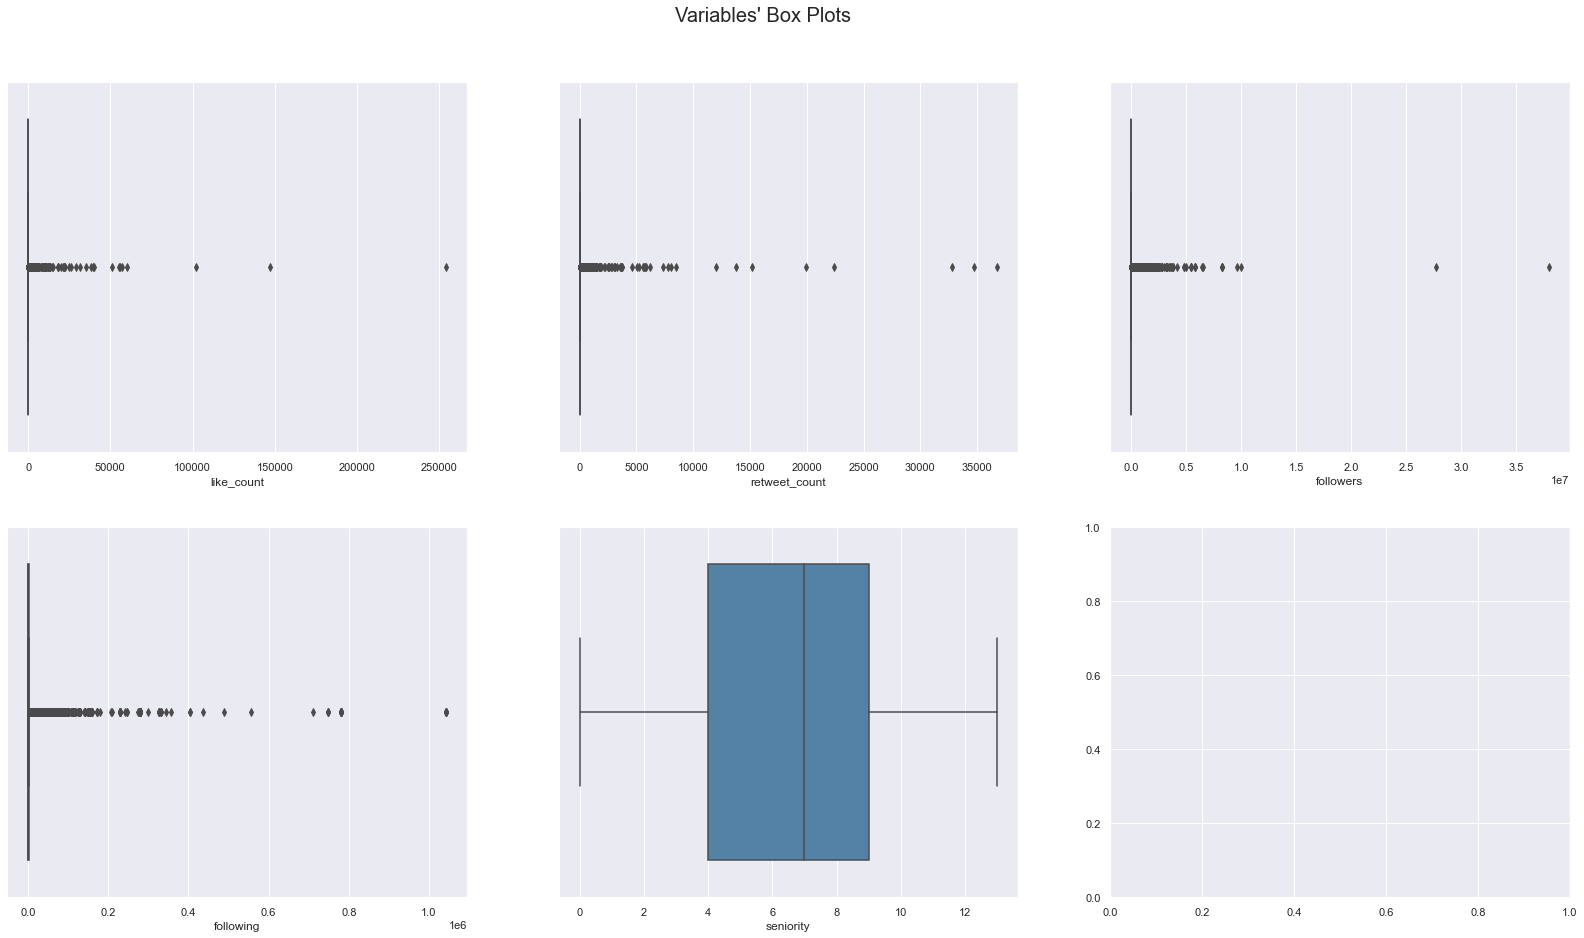

In [52]:
boxplot(df, var_outliers_imp)

In [53]:
outliers_filter = (((df['followers'] < 10000) & (df['following'] < 70000)) & ((df['retweet_count'] < 100) & (df['like_count'] < 500) & (df['seniority'] < 17)))
outliers_removal(df, outliers_filter)

         Percentage of data kept after removing outliers: 94.8 %
         Percentage of data removed: 5.2035 %
         Size after outlier removal: 507187
         N. of tweets with atleast 1 retweet: 80159
         Percentage of tweets with atleast 1 retweet removed: 14.2116 %



,index,tweet_id,text,timestamp,user_id,like_count,retweet_count,quote_count,reply_count,reach,...,verified_True,hashtags_True,day_phase_enc,day_of_week_enc,month_enc,year_enc,sentiment_enc,verified_enc,hashtags_enc,seniority
0,0,1079904885246705665,I’ll never salt you down 😌,2019-01-01 00:59:22,497001647,0,0,0,0,1468,...,0,0,2,5,4,0,2,0,0,7
1,1,1181478514601672704,I need to go to sleeeeeep,2019-10-08 07:56:43+00:00,497001647,0,0,0,0,1468,...,0,0,3,5,10,0,1,0,0,7
2,2,1079904884445581312,You know who you are; but some of you I’ve fol...,2019-01-01 00:59:22,112542289,2,1,0,0,2969,...,0,0,2,5,4,0,2,0,0,9
3,3,1083000265597485056,Good morning frens. Don’t think about yesterda...,2019-01-09 13:59:19,112542289,5,1,0,0,2969,...,0,0,0,6,4,0,1,0,0,9
4,4,1100394993972404224,Have any of you seen that post about the salon...,2019-02-26 13:59:45+00:00,112542289,3,1,0,1,4897,...,0,0,0,5,3,0,2,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535022,535022,1212131305615511554,It’s taken almost 20 years.... but the boys ap...,2019-12-31 21:59:58+00:00,3160522828,62,3,1,8,5864,...,0,0,4,5,2,0,2,0,0,4
535023,535023,1212131306085244928,My boss is boss. https://t.co/aButy11GXA,2019-12-31 21:59:58+00:00,802746211,1,0,0,0,681,...,0,0,4,5,2,0,1,0,0,7
535024,535024,1212131307162988544,Mood: https://t.co/d5iIJatvZO,2019-12-31 21:59:58+00:00,713174863,19,2,0,0,1455,...,0,0,4,5,2,0,1,0,0,7
535025,535025,1212131308010430464,I’m watching Star Wars for the first time.,2019-12-31 21:59:58+00:00,2463021749,0,0,0,1,1171,...,0,0,4,5,2,0,0,0,0,5


In [54]:
outliers_filter = (((df['followers'] < 100000) & (df['following'] < 70000)) & ((df['retweet_count'] < 100) & (df['like_count'] < 500) & (df['seniority'] < 17)))
outliers_removal(df, outliers_filter)

         Percentage of data kept after removing outliers: 99.44 %
         Percentage of data removed: 0.5585 %
         Size after outlier removal: 532039
         N. of tweets with atleast 1 retweet: 91021
         Percentage of tweets with atleast 1 retweet removed: 2.5867 %



,index,tweet_id,text,timestamp,user_id,like_count,retweet_count,quote_count,reply_count,reach,...,verified_True,hashtags_True,day_phase_enc,day_of_week_enc,month_enc,year_enc,sentiment_enc,verified_enc,hashtags_enc,seniority
0,0,1079904885246705665,I’ll never salt you down 😌,2019-01-01 00:59:22,497001647,0,0,0,0,1468,...,0,0,2,5,4,0,2,0,0,7
1,1,1181478514601672704,I need to go to sleeeeeep,2019-10-08 07:56:43+00:00,497001647,0,0,0,0,1468,...,0,0,3,5,10,0,1,0,0,7
2,2,1079904884445581312,You know who you are; but some of you I’ve fol...,2019-01-01 00:59:22,112542289,2,1,0,0,2969,...,0,0,2,5,4,0,2,0,0,9
3,3,1083000265597485056,Good morning frens. Don’t think about yesterda...,2019-01-09 13:59:19,112542289,5,1,0,0,2969,...,0,0,0,6,4,0,1,0,0,9
4,4,1100394993972404224,Have any of you seen that post about the salon...,2019-02-26 13:59:45+00:00,112542289,3,1,0,1,4897,...,0,0,0,5,3,0,2,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535022,535022,1212131305615511554,It’s taken almost 20 years.... but the boys ap...,2019-12-31 21:59:58+00:00,3160522828,62,3,1,8,5864,...,0,0,4,5,2,0,2,0,0,4
535023,535023,1212131306085244928,My boss is boss. https://t.co/aButy11GXA,2019-12-31 21:59:58+00:00,802746211,1,0,0,0,681,...,0,0,4,5,2,0,1,0,0,7
535024,535024,1212131307162988544,Mood: https://t.co/d5iIJatvZO,2019-12-31 21:59:58+00:00,713174863,19,2,0,0,1455,...,0,0,4,5,2,0,1,0,0,7
535025,535025,1212131308010430464,I’m watching Star Wars for the first time.,2019-12-31 21:59:58+00:00,2463021749,0,0,0,1,1171,...,0,0,4,5,2,0,0,0,0,5


In [55]:
outliers_filter = (((df['followers'] < 100000) & (df['following'] < 30000)) & ((df['retweet_count'] < 100) & (df['like_count'] < 400) & (df['seniority'] < 17)))
outliers_removal(df, outliers_filter)

         Percentage of data kept after removing outliers: 99.28 %
         Percentage of data removed: 0.7172 %
         Size after outlier removal: 531190
         N. of tweets with atleast 1 retweet: 90577
         Percentage of tweets with atleast 1 retweet removed: 3.0619 %



,index,tweet_id,text,timestamp,user_id,like_count,retweet_count,quote_count,reply_count,reach,...,verified_True,hashtags_True,day_phase_enc,day_of_week_enc,month_enc,year_enc,sentiment_enc,verified_enc,hashtags_enc,seniority
0,0,1079904885246705665,I’ll never salt you down 😌,2019-01-01 00:59:22,497001647,0,0,0,0,1468,...,0,0,2,5,4,0,2,0,0,7
1,1,1181478514601672704,I need to go to sleeeeeep,2019-10-08 07:56:43+00:00,497001647,0,0,0,0,1468,...,0,0,3,5,10,0,1,0,0,7
2,2,1079904884445581312,You know who you are; but some of you I’ve fol...,2019-01-01 00:59:22,112542289,2,1,0,0,2969,...,0,0,2,5,4,0,2,0,0,9
3,3,1083000265597485056,Good morning frens. Don’t think about yesterda...,2019-01-09 13:59:19,112542289,5,1,0,0,2969,...,0,0,0,6,4,0,1,0,0,9
4,4,1100394993972404224,Have any of you seen that post about the salon...,2019-02-26 13:59:45+00:00,112542289,3,1,0,1,4897,...,0,0,0,5,3,0,2,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535022,535022,1212131305615511554,It’s taken almost 20 years.... but the boys ap...,2019-12-31 21:59:58+00:00,3160522828,62,3,1,8,5864,...,0,0,4,5,2,0,2,0,0,4
535023,535023,1212131306085244928,My boss is boss. https://t.co/aButy11GXA,2019-12-31 21:59:58+00:00,802746211,1,0,0,0,681,...,0,0,4,5,2,0,1,0,0,7
535024,535024,1212131307162988544,Mood: https://t.co/d5iIJatvZO,2019-12-31 21:59:58+00:00,713174863,19,2,0,0,1455,...,0,0,4,5,2,0,1,0,0,7
535025,535025,1212131308010430464,I’m watching Star Wars for the first time.,2019-12-31 21:59:58+00:00,2463021749,0,0,0,1,1171,...,0,0,4,5,2,0,0,0,0,5


In [63]:
outliers_filter = (((df['followers'] < 100000) & (df['following'] < 30000)) & ((df['retweet_count'] < 1000) & (df['like_count'] < 400) & (df['seniority'] < 17)))
outliers_removal(df, outliers_filter)

         Percentage of data kept after removing outliers: 99.3 %
         Percentage of data removed: 0.7018 %
         Size after outlier removal: 531272
         N. of tweets with atleast 1 retweet: 90659
         Percentage of tweets with atleast 1 retweet removed: 2.9742 %



,index,tweet_id,text,timestamp,user_id,like_count,retweet_count,quote_count,reply_count,reach,...,verified_True,hashtags_True,day_phase_enc,day_of_week_enc,month_enc,year_enc,sentiment_enc,verified_enc,hashtags_enc,seniority
0,0,1079904885246705665,I’ll never salt you down 😌,2019-01-01 00:59:22,497001647,0,0,0,0,1468,...,0,0,2,5,4,0,2,0,0,7
1,1,1181478514601672704,I need to go to sleeeeeep,2019-10-08 07:56:43+00:00,497001647,0,0,0,0,1468,...,0,0,3,5,10,0,1,0,0,7
2,2,1079904884445581312,You know who you are; but some of you I’ve fol...,2019-01-01 00:59:22,112542289,2,1,0,0,2969,...,0,0,2,5,4,0,2,0,0,9
3,3,1083000265597485056,Good morning frens. Don’t think about yesterda...,2019-01-09 13:59:19,112542289,5,1,0,0,2969,...,0,0,0,6,4,0,1,0,0,9
4,4,1100394993972404224,Have any of you seen that post about the salon...,2019-02-26 13:59:45+00:00,112542289,3,1,0,1,4897,...,0,0,0,5,3,0,2,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535022,535022,1212131305615511554,It’s taken almost 20 years.... but the boys ap...,2019-12-31 21:59:58+00:00,3160522828,62,3,1,8,5864,...,0,0,4,5,2,0,2,0,0,4
535023,535023,1212131306085244928,My boss is boss. https://t.co/aButy11GXA,2019-12-31 21:59:58+00:00,802746211,1,0,0,0,681,...,0,0,4,5,2,0,1,0,0,7
535024,535024,1212131307162988544,Mood: https://t.co/d5iIJatvZO,2019-12-31 21:59:58+00:00,713174863,19,2,0,0,1455,...,0,0,4,5,2,0,1,0,0,7
535025,535025,1212131308010430464,I’m watching Star Wars for the first time.,2019-12-31 21:59:58+00:00,2463021749,0,0,0,1,1171,...,0,0,4,5,2,0,0,0,0,5


In [59]:
outliers_filter = (((df['followers'] < 5000) & (df['following'] < 5000)) & ((df['retweet_count'] < 1000) & (df['like_count'] < 400) & (df['seniority'] < 17)))
df_test = outliers_removal(df, outliers_filter)

         Percentage of data kept after removing outliers: 89.71000000000001 %
         Percentage of data removed: 10.289 %
         Size after outlier removal: 479978
         N. of tweets with atleast 1 retweet: 72104
         Percentage of tweets with atleast 1 retweet removed: 22.8323 %



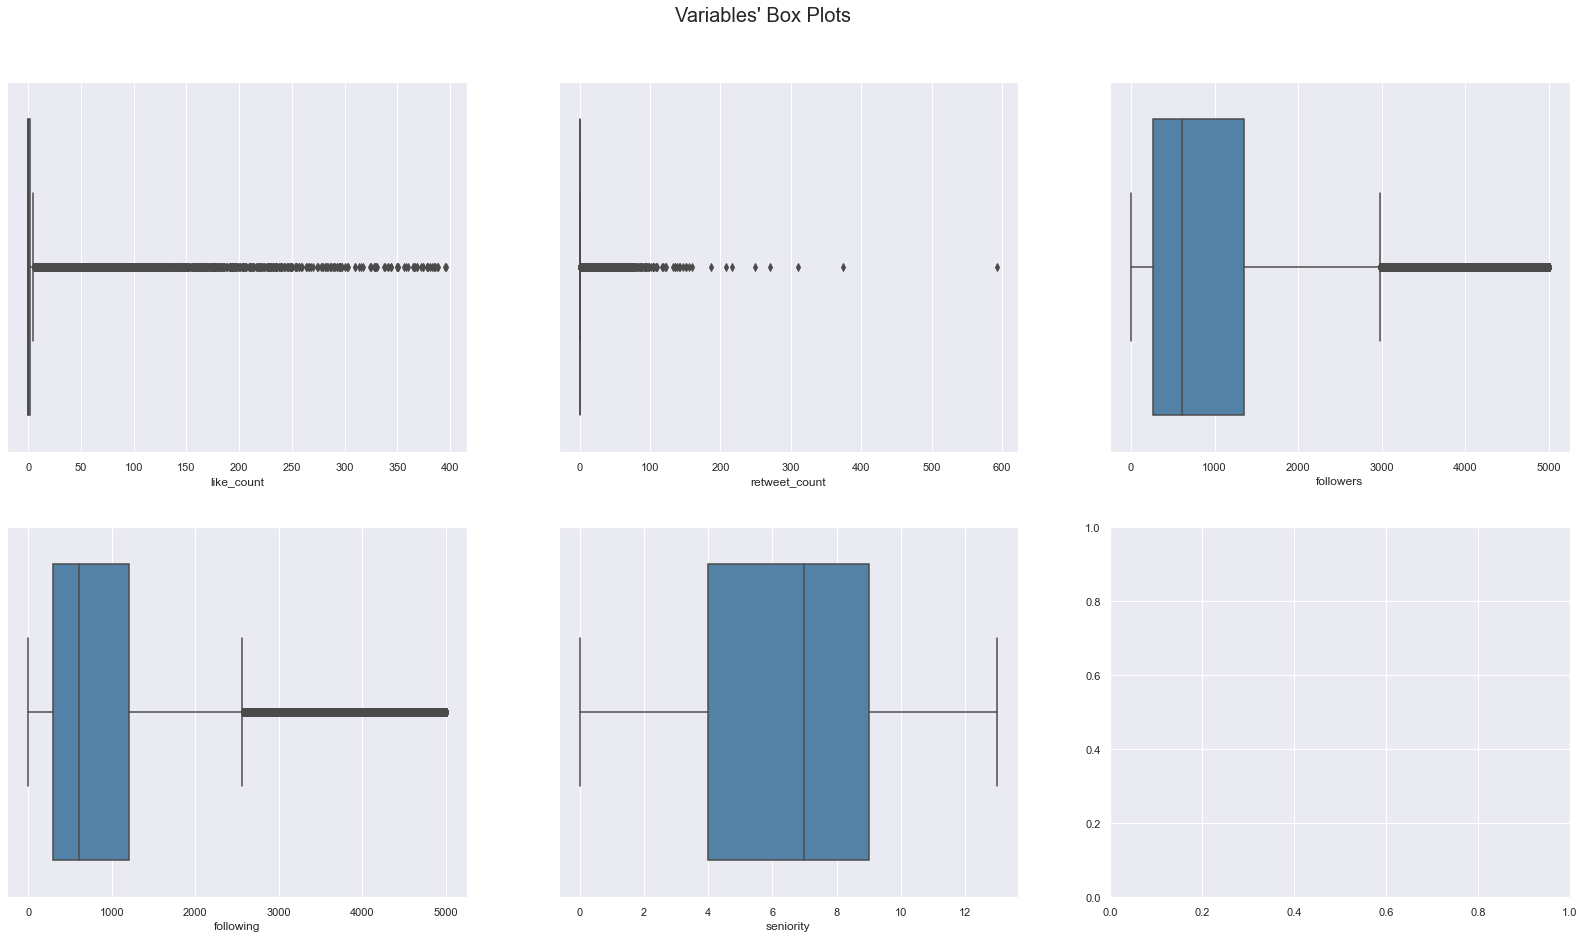

In [60]:
boxplot(df_test, var_outliers_imp)

In [66]:
outliers_filter = (df['retweet_count'] < 5)
df_test = outliers_removal(df, outliers_filter)

         Percentage of data kept after removing outliers: 97.50999999999999 %
         Percentage of data removed: 2.4933 %
         Size after outlier removal: 521687
         N. of tweets with atleast 1 retweet: 80098
         Percentage of tweets with atleast 1 retweet removed: 14.2768 %



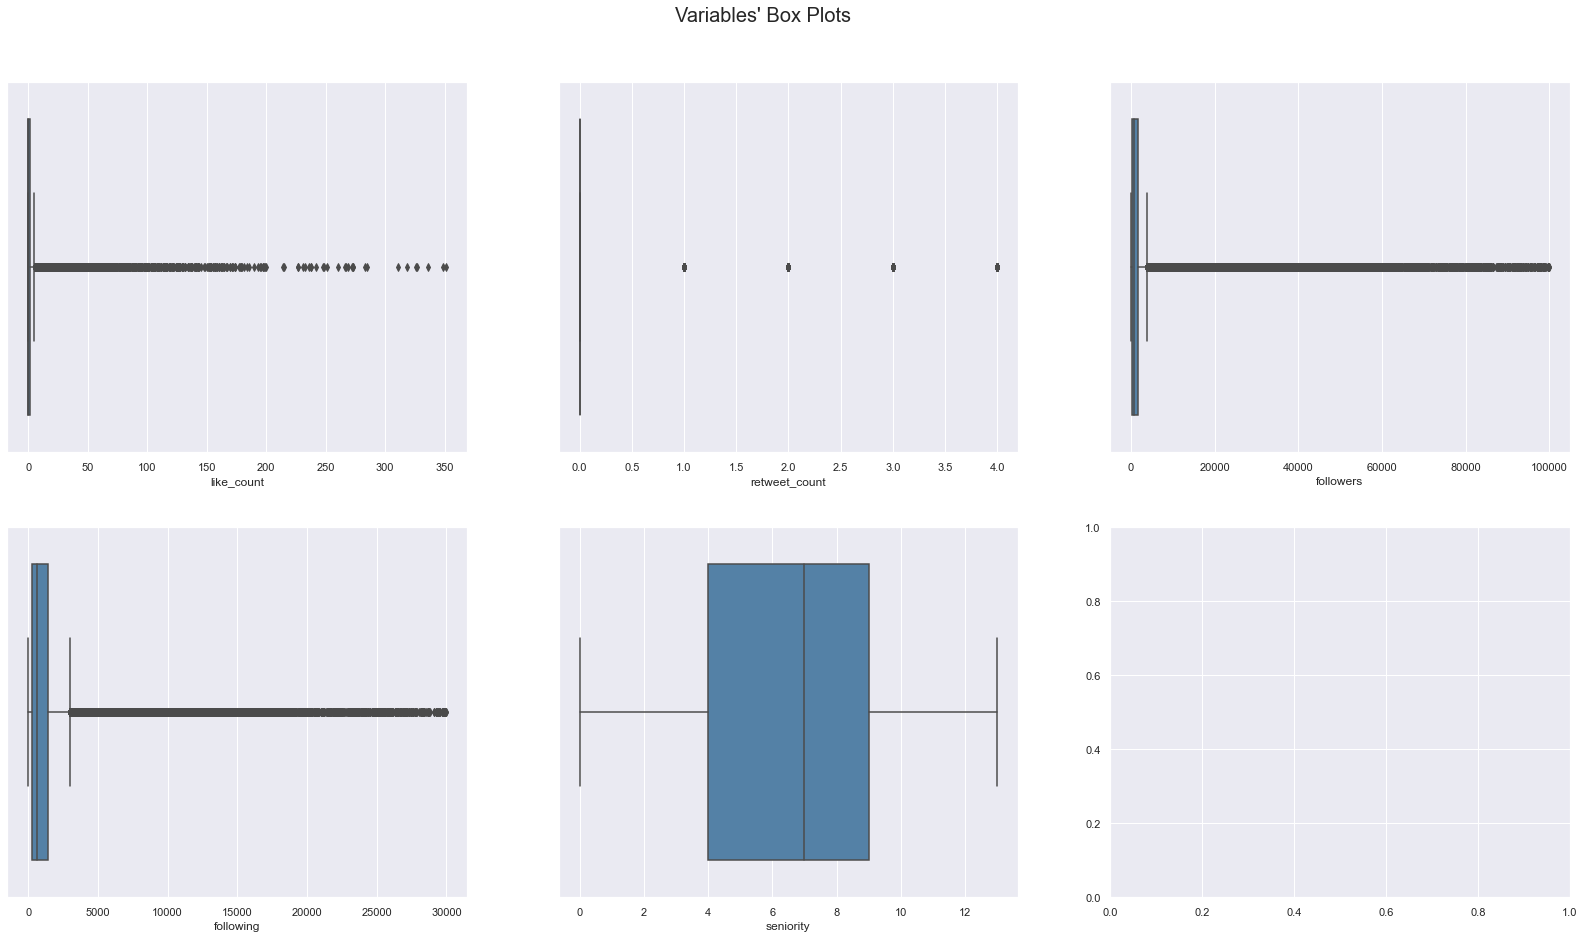

In [65]:
boxplot(df_test, var_outliers_imp)

## Save the final version of the dataset

In [54]:
save_to_csv(df, df_retweets_info, FINAL_DATASET, FINAL_DATASET_RETWEETS_INFO)